**TASK 3**

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

Enter test size between 0 and 1:  0.2


Evaluation Metrics:
MAE: 970043.4039201637
MSE: 1754318687330.6628
R² Score: 0.6529242642153186


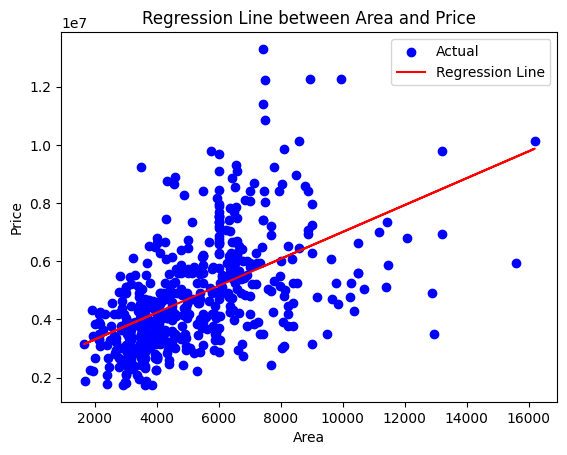

Intercept: 260032.35760741588
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("Housing.csv")


data["mainroad"] = data["mainroad"].map({"yes": 1, "no": 0})
data["guestroom"] = data["guestroom"].map({"yes": 1, "no": 0})
data["basement"] = data["basement"].map({"yes": 1, "no": 0})
data["hotwaterheating"] = data["hotwaterheating"].map({"yes": 1, "no": 0})
data["airconditioning"] = data["airconditioning"].map({"yes": 1, "no": 0})
data["prefarea"] = data["prefarea"].map({"yes": 1, "no": 0})

data = pd.get_dummies(data, columns=["furnishingstatus"], drop_first=True)
print(data.head())

X = data.drop("price", axis=1).values
y = data["price"].values
test_split = float(input("Enter test size between 0 and 1: "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Evaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


plt.scatter(data["area"], data["price"], color='blue', label="Actual")
plt.xlabel("Area")
plt.ylabel("Price")
area_reshape = data["area"].values.reshape(-1, 1)
line_model = LinearRegression()
line_model.fit(area_reshape, y)
line_pred = line_model.predict(area_reshape)
plt.plot(data["area"], line_pred, color='red', label="Regression Line")

plt.title("Regression Line between Area and Price")
plt.legend()
plt.show()

# Step 6: Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
